In [40]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

from sklearn.preprocessing import StandardScaler, RobustScaler


from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [41]:
df = pd.read_csv('./creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
#To check for any null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [19]:
print('Non-fraudulent transcations = ',len(df[df['Class']==0]))
print('Fraudulent transcations = ',len(df[df['Class']==1]))

Non-fraudulent transcations =  284315
Fraudulent transcations =  492


This clearly shows that the data is very imbalanced. Hence, it will be prone to overfitting unless modified.

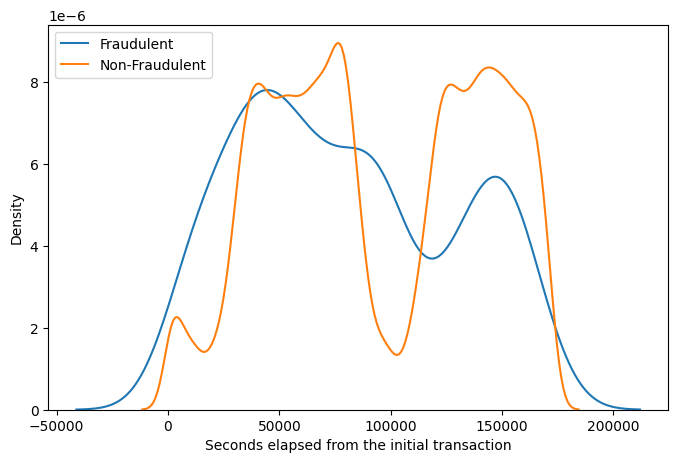

In [24]:
fraud_data = df[df['Class'] == 1]
non_fraud_data = df[df['Class'] == 0]

plt.figure(figsize=(8,5))
ax = sns.distplot(fraud_data['Time'], label = 'Fraudulent', hist=False)
ax = sns.distplot(non_fraud_data['Time'], label = 'Non-Fraudulent', hist=False)
ax.set(xlabel = 'Seconds elapsed from the initial transaction')
plt.legend()
plt.show()

In [54]:
rob = RobustScaler()

df['scaled_amount'] = rob.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = rob.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time', 'Amount'], axis = 1, inplace=True)

In [67]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


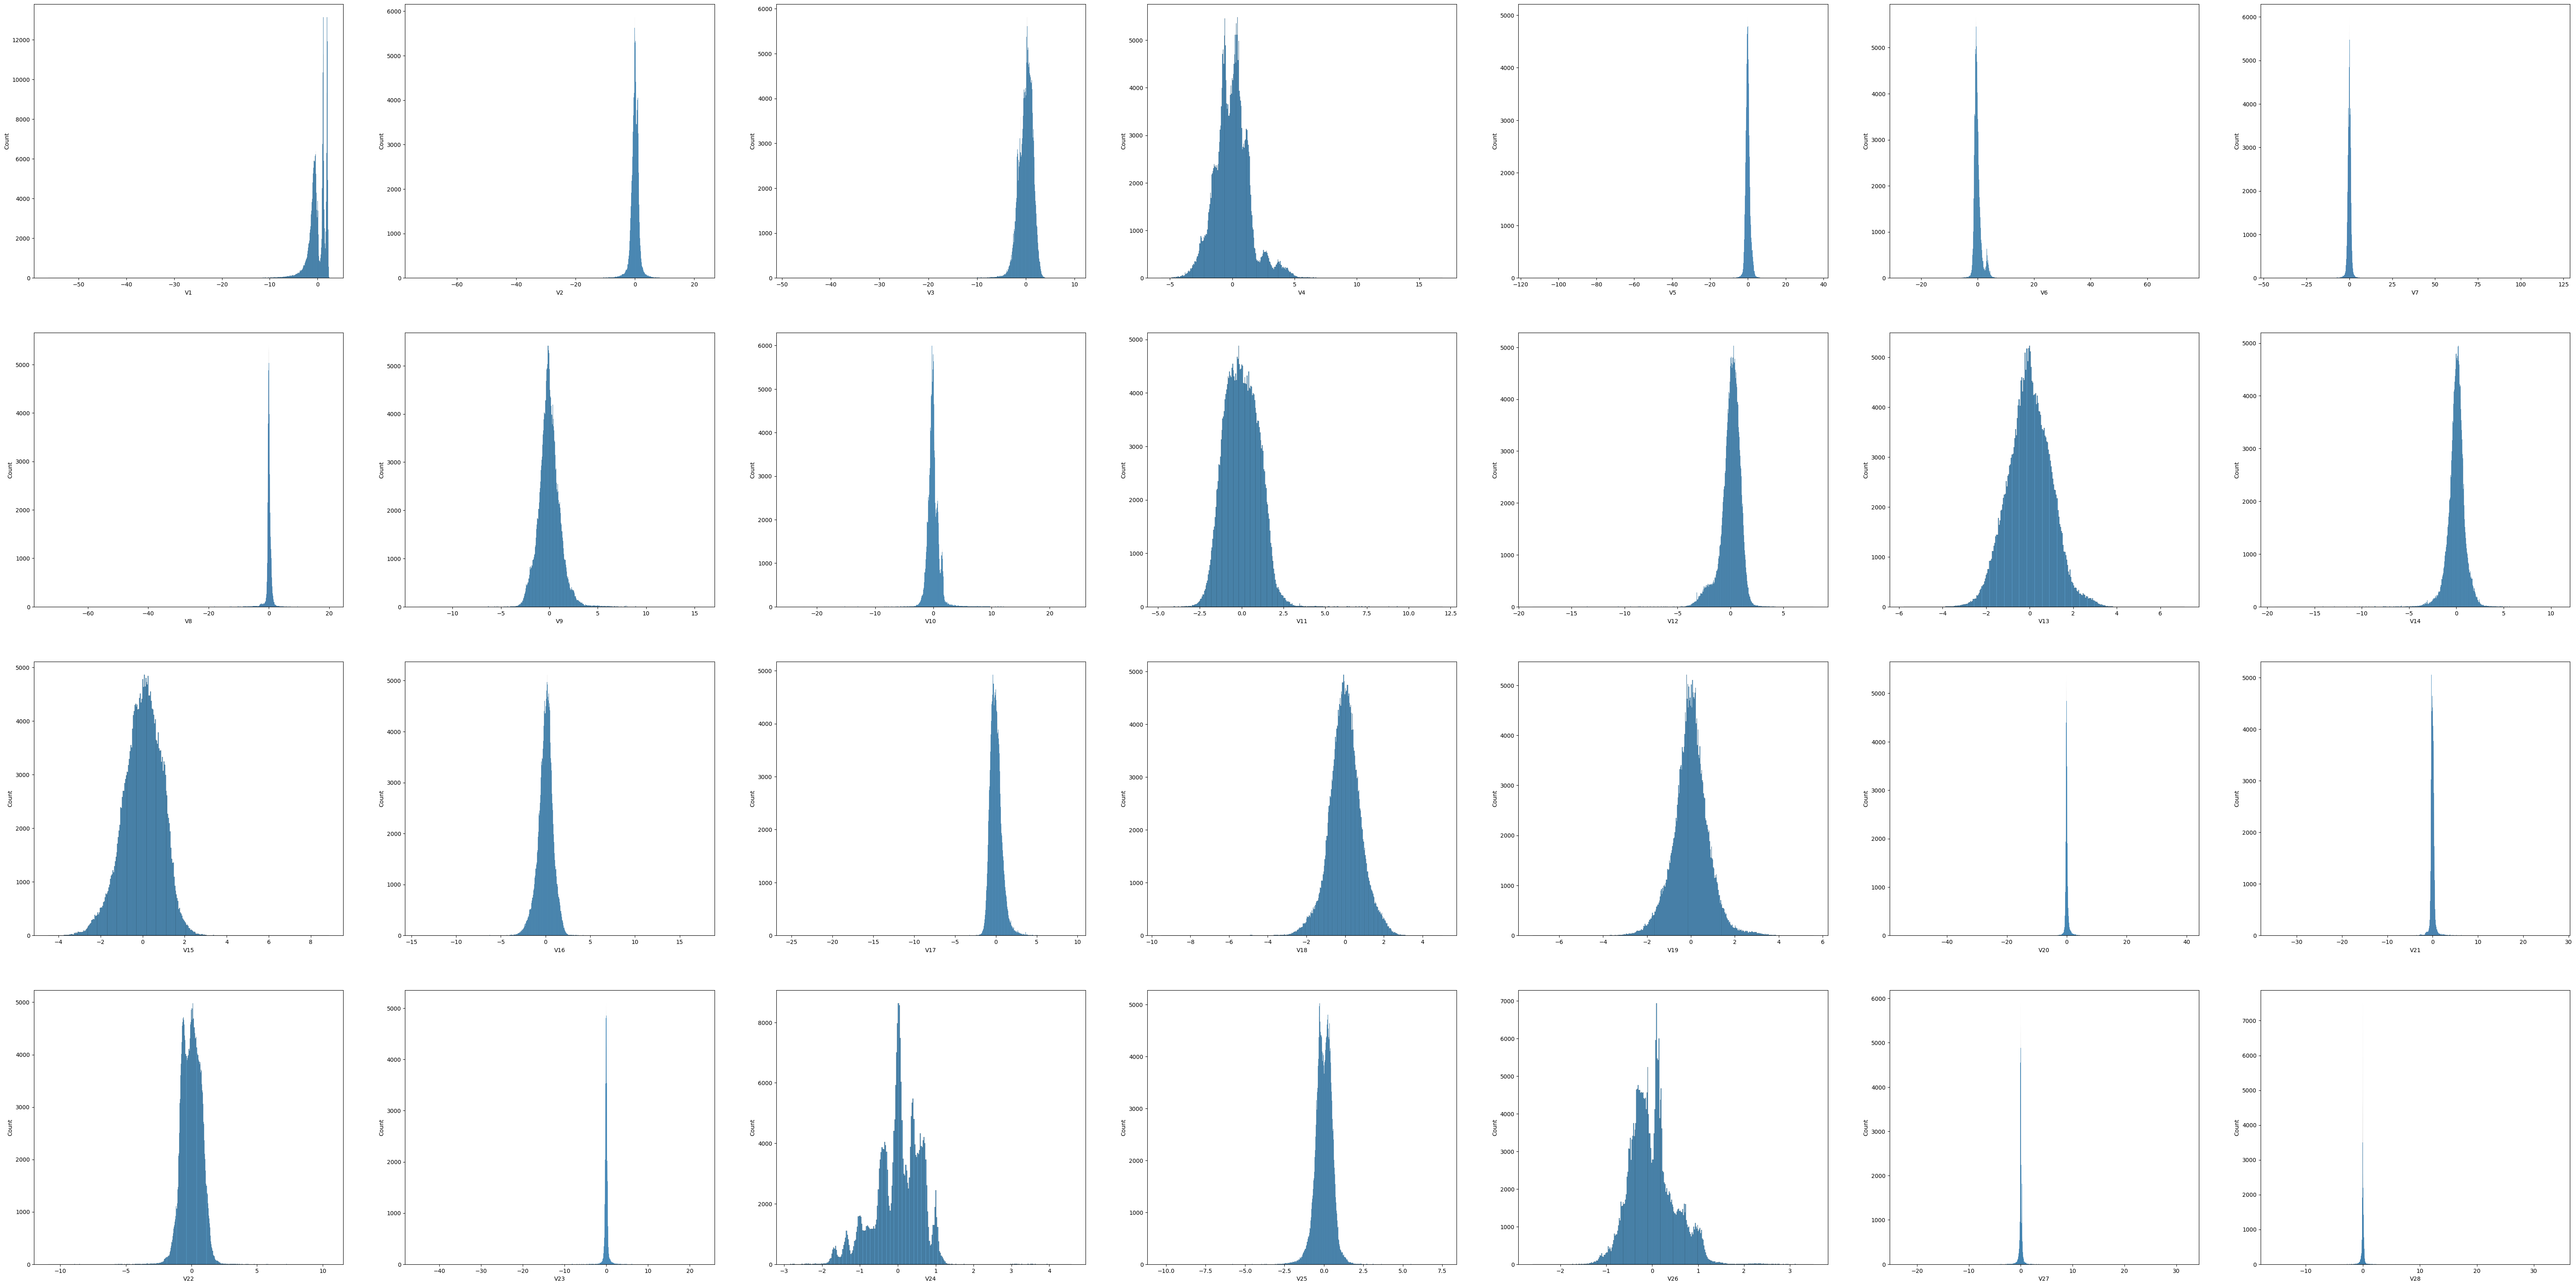

In [81]:
features = df.copy()
features = df.iloc[:, :-3]
col = features.columns.values
count = 0

fig, axs = plt.subplots(4, 7, figsize = (80, 40))
# fig.set_figwidth(80)
# fig.set_figheight(40)

for i in range(4) :
    for j in range(7) : 
        sns.histplot(features[col[count]], ax = axs[i, j])
        count += 1

del features

In [83]:
X = df.drop('Class', axis = 1)
y = df['Class']

skfold = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
for train_index, test_index in skfold.split(X, y):
    print(train_index.shape,test_index.shape)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

(256326,) (28481,)
(256326,) (28481,)
(256326,) (28481,)
(256326,) (28481,)
(256326,) (28481,)
(256326,) (28481,)
(256326,) (28481,)
(256327,) (28480,)
(256327,) (28480,)
(256327,) (28480,)


In [90]:
df = df.sample(frac=1)
fraud = df.loc[df['Class'] == 1]
non_fraud = df.loc[df['Class'] == 0][:492]

new_df = pd.concat([fraud, non_fraud])
new_df = new_df.sample(frac=1, random_state=42)

new_df.shape

(984, 31)

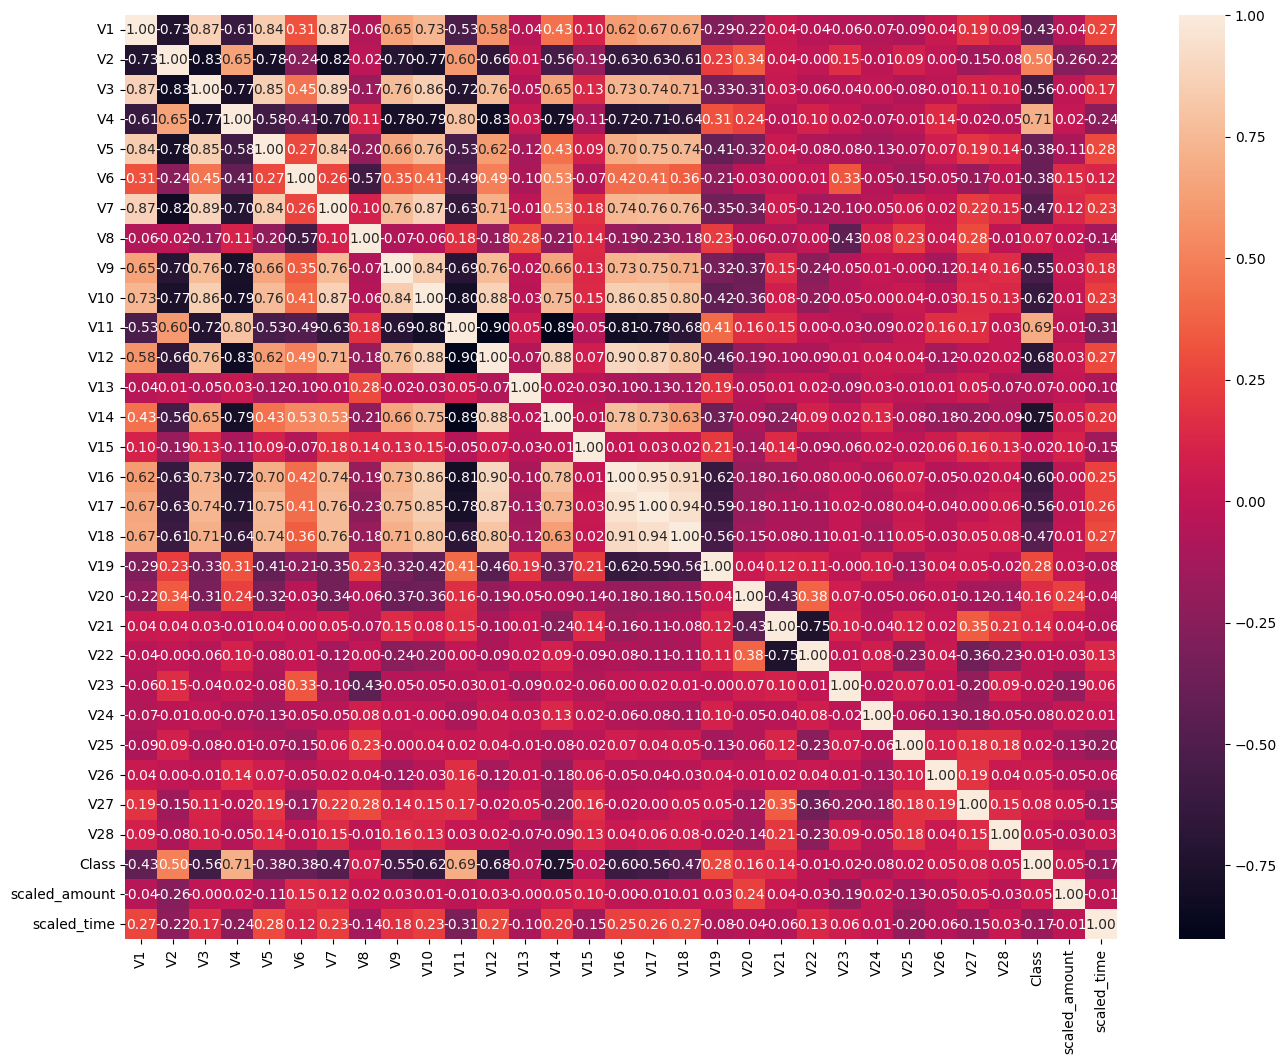

In [92]:
plt.subplots(figsize = (16,12))
sns.heatmap(new_df.corr(), annot = True, fmt = '.2f')
plt.show()

This clearly shows that the features V2, V4, V11, V19 are highly positively correlated and V3, V9, V10, V12, V14, V16, V17 are highly negatively correlated

Text(0.5, 1.0, 'V19 vs Class Positive Correlation')

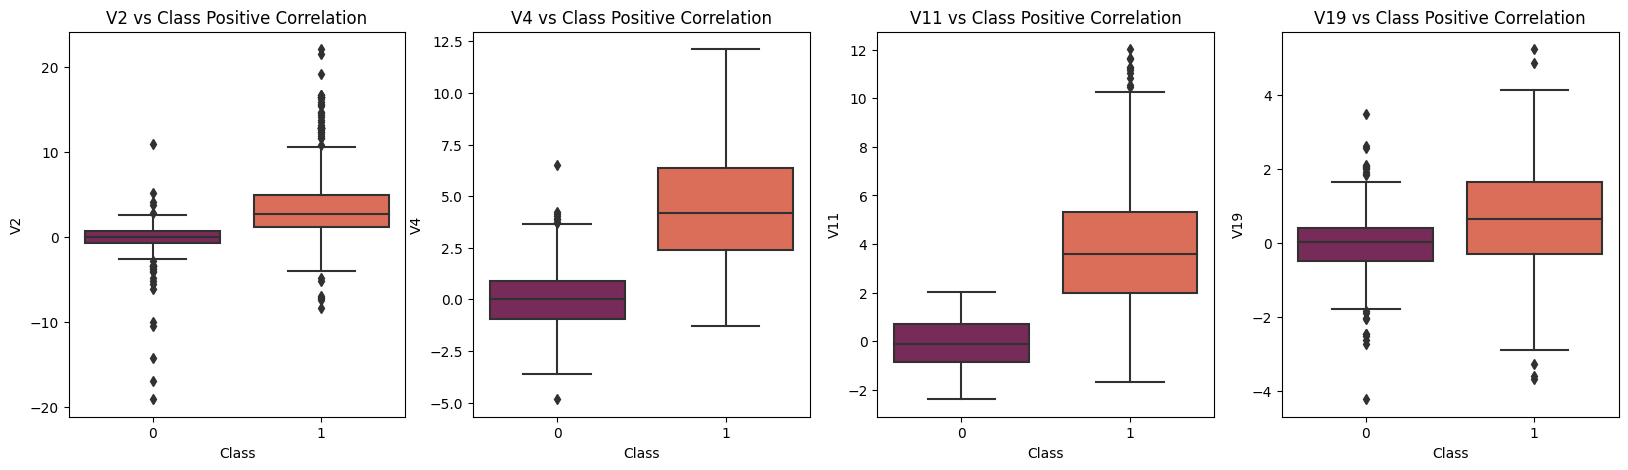

In [101]:
fig,axes = plt.subplots(ncols=4,figsize=(20,5))
sns.boxplot(x = "Class" , y='V2' , data = new_df,palette="rocket", ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x = "Class" , y='V4' , data = new_df,palette="rocket", ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')

sns.boxplot(x = "Class" , y='V11' , data = new_df,palette="rocket", ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x = "Class" , y='V19' , data = new_df,palette="rocket" ,ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

Text(0.5, 1.0, 'V17 vs Class Negative Correlation')

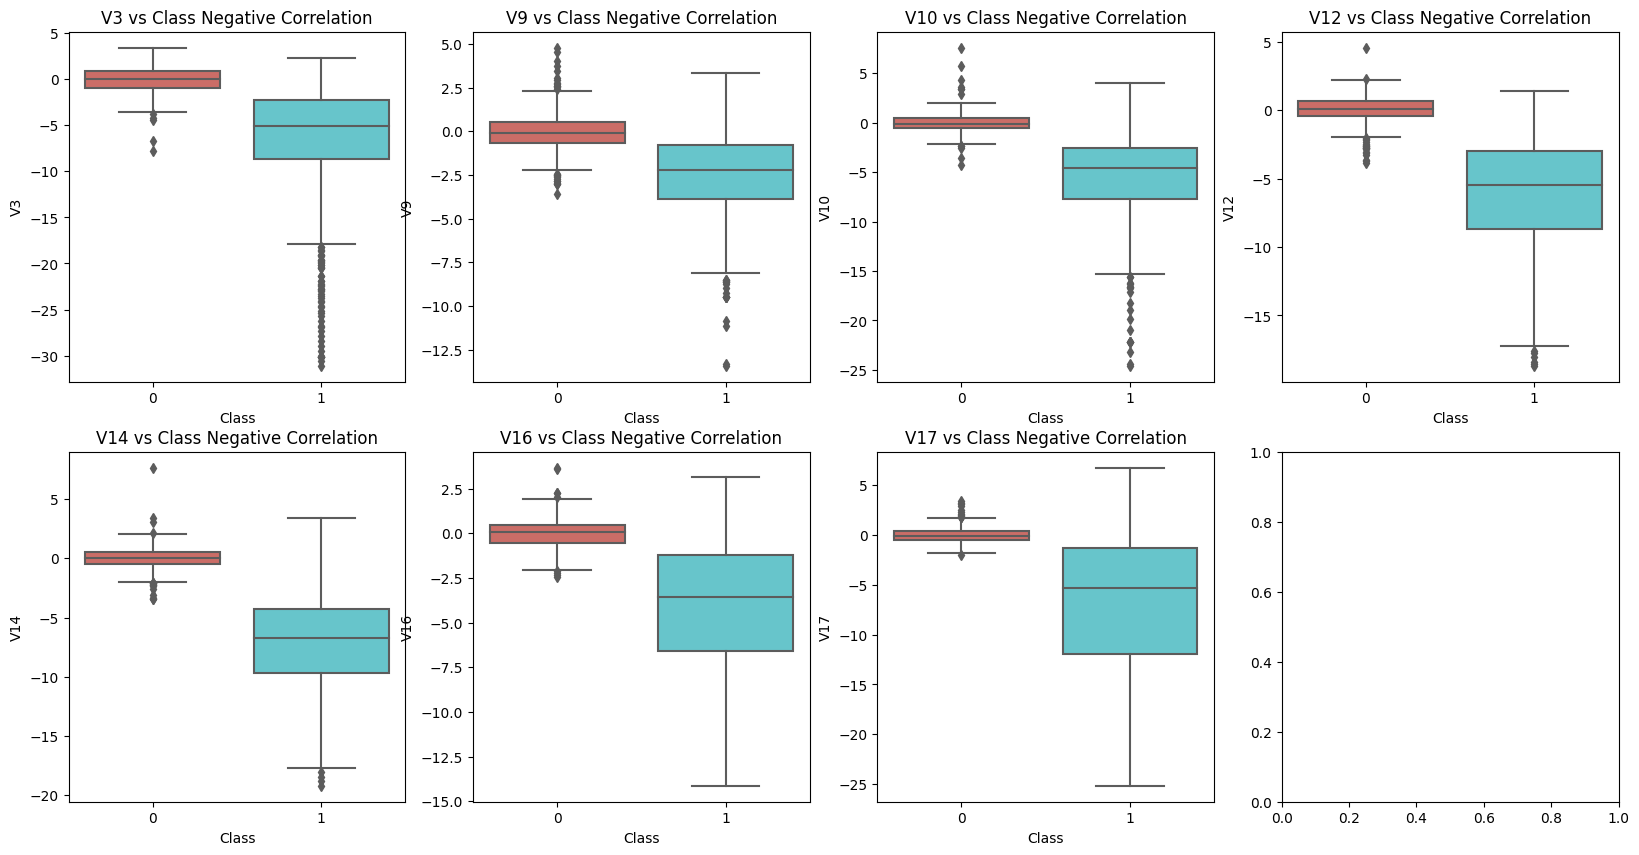

In [103]:
fig,axes = plt.subplots(ncols=4,nrows=2, figsize=(20,10))
sns.boxplot(x = "Class" , y='V3' , data = new_df,palette="hls", ax=axes[0][0])
axes[0][0].set_title('V3 vs Class Negative Correlation')

sns.boxplot(x = "Class" , y='V9' , data = new_df,palette="hls", ax=axes[0][1])
axes[0][1].set_title('V9 vs Class Negative Correlation')

sns.boxplot(x = "Class" , y='V10' , data = new_df,palette="hls", ax=axes[0][2])
axes[0][2].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x = "Class" , y='V12' , data = new_df,palette="hls", ax=axes[0][3])
axes[0][3].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x = "Class" , y='V14' , data = new_df,palette="hls", ax=axes[1][0])
axes[1][0].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x = "Class" , y='V16' , data = new_df,palette="hls", ax=axes[1][1])
axes[1][1].set_title('V16 vs Class Negative Correlation')

sns.boxplot(x = "Class" , y='V17' , data = new_df,palette="hls", ax=axes[1][2])
axes[1][2].set_title('V17 vs Class Negative Correlation')